## 1. import dataset and modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
'''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)


raw_dataset = pd.read_csv(path)
'''

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        path = os.path.join(dirname, filename)\n\n\nraw_dataset = pd.read_csv(path)\n"

In [4]:
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')

## 2. Exploratory Data Analysis

### 2.1 inspecting the dataset

In [5]:
 train_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_raw.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# preprocessing decision:

# replace null age with average
# only first class has cabin 
# drop cabin

In [10]:
train_raw['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## 2.2 Explore features

In [173]:
# explore pclass
train_raw['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [174]:
# explore names

# explore titles
names = train_raw['Name']
title_col = []
for name in names:
    t = name.split(sep=',')[1]
    t = t[1:]
    t = t[0:t.find('.')]
    title_col.append(t)

unique_titles = list(set(title_col))
unique_titles

['Don',
 'Mme',
 'Miss',
 'Rev',
 'Ms',
 'Mr',
 'Major',
 'Jonkheer',
 'Master',
 'Dr',
 'Col',
 'Capt',
 'Lady',
 'Mrs',
 'the Countess',
 'Sir',
 'Mlle']

In [175]:
# explore titles

train = train_raw.copy()
train['Title'] = title_col
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


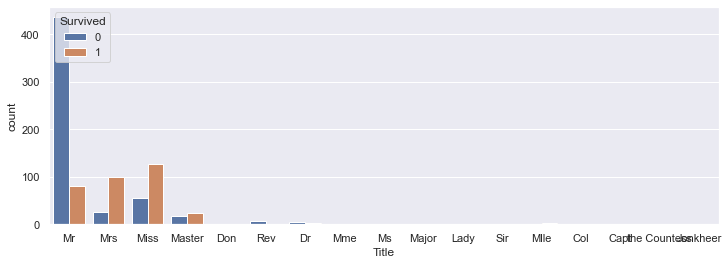

In [176]:
plt.figure(figsize=(12,4))
sns.countplot(x='Title', data=train,hue='Survived')
plt.show()
# the majority is Mr, Mrs, Miss and Master 
# The rest will be pooled into a "rare category. 

<AxesSubplot:xlabel='Age', ylabel='Count'>

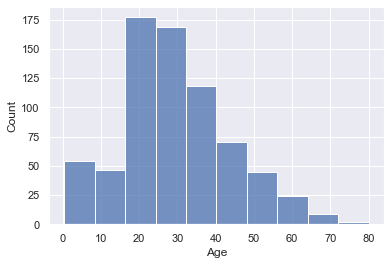

In [177]:
# explore age distribution
train_1 = train.copy()
train_1
train_1.dropna(axis=1)
sns.histplot(data=train_1,x=train_1['Age'], bins=10)

In [178]:
# 177 observations with missing values in Age were dropped. 
# the distribution of age is bell shaped but skewed to right
# use mean to replace the missing values in age

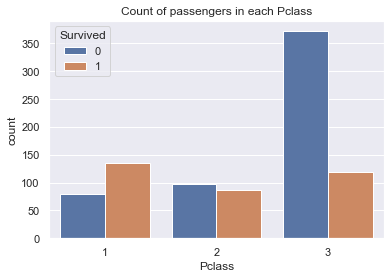

In [179]:
# breakdown pclass
sns.countplot(x='Pclass',data=train,hue='Survived').set(title="Count of passengers in each Pclass")
plt.show()

In [180]:
train.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [181]:
i = 1
total_passengers = train.shape[0]
for mortality_per_class in [80,97,372]:
    print ('pclass {}'.format(i),': mortality rate {:.3f}%'.format(mortality_per_class*100/total_passengers))
    i +=1

pclass 1 : mortality rate 8.979%
pclass 2 : mortality rate 10.887%
pclass 3 : mortality rate 41.751%


In [182]:
# explore sex and surviorship
train.groupby('Sex')['Survived'].value_counts()


Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [183]:
train['Sex'].value_counts().sort_values()


female    314
male      577
Name: Sex, dtype: int64

In [184]:
# survive_percentage_female
sf = 233/314
sf

0.7420382165605095

In [185]:
# survive_percentage_male
mf = 468/577
mf

0.8110918544194108

In [186]:
print('{:.3f}'.format((mf-sf)*100/mf))
# male is like to survive by 8% relative to female

8.514


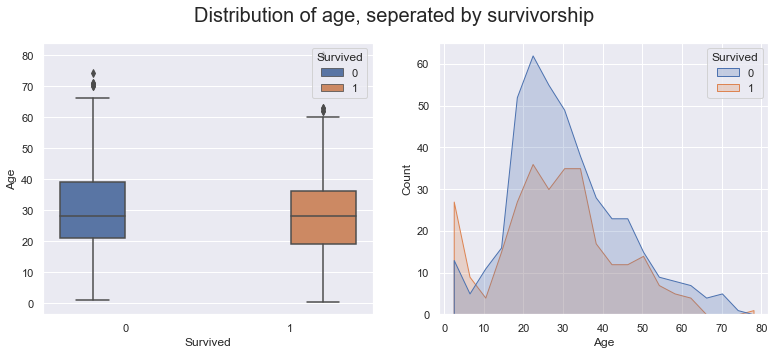

In [187]:
# distribution of age
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
fig.suptitle('Distribution of age, seperated by survivorship',size=20)
plot_1 = sns.boxplot(x='Survived',y='Age',hue='Survived',data=train,ax=axes[0])
sns.move_legend(plot_1,loc='upper right', title = 'Survived')
plot_2 = sns.histplot(data=train,x='Age',ax=axes[1],hue='Survived',element="poly")

In [232]:
# is younger people likely to survive? 

mortality_subset = train[train['Survived']==0]['Age']
survived_subset = train[train['Survived']==1]['Age']

In [233]:
mortality_subset.shape

(549,)

In [234]:
survived_subset.shape

(342,)

In [237]:
from scipy.stats import ttest_ind
tstat, t_p_value = ttest_ind(a=mortality_subset,b=survived_subset,nan_policy='omit')

In [238]:
t_p_value

0.03912465401348249

In [239]:
# 96%+ when sampled, any surviors are younger than any deceased. 
# younger passengers are more likely to survive Titanic

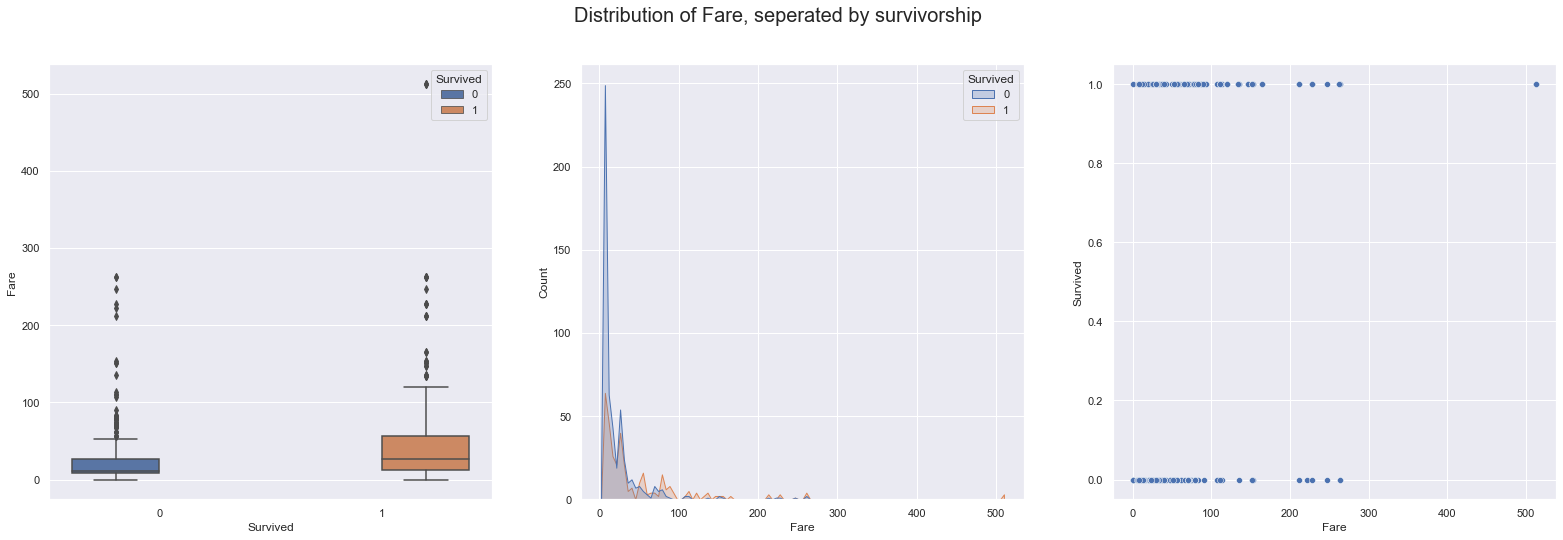

In [191]:
# distribution of Fare
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(27,8))
fig.suptitle('Distribution of Fare, seperated by survivorship', size = 20)
plot_3 = sns.boxplot(x='Survived',y='Fare',hue='Survived',data=train,ax=axes[0])
sns.move_legend(plot_3,loc='upper right', title = 'Survived')
plot_4 = sns.histplot(data=train,x='Fare',ax=axes[1],hue='Survived',element="poly")
plot_5 = sns.scatterplot(x=train['Fare'],y =train['Survived'],ax=axes[2])

In [192]:
train[train['Fare']>400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr


In [209]:
train[train['Fare']>200].count()

PassengerId    20
Survived       20
Pclass         20
Name           20
Sex            20
Age            18
SibSp          20
Parch          20
Ticket         20
Fare           20
Cabin          17
Embarked       20
Title          20
dtype: int64

In [217]:
# drop fare>200 outliers
# drop 5% of records to stat test
train_eda_1 = train.copy()
train_eda_1.drop(train[train['Fare']>200].index, inplace=True)

In [218]:
train_eda_1.shape

(871, 13)

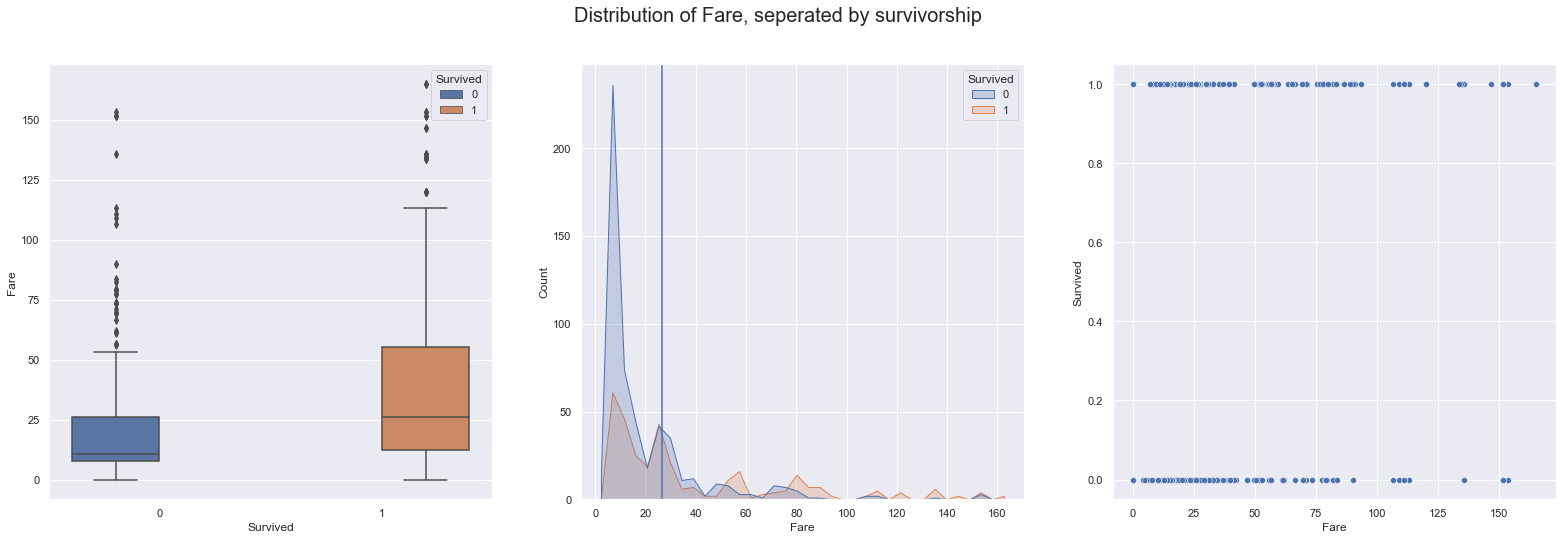

In [219]:
# distribution of Fare
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(27,8))
fig.suptitle('Distribution of Fare, seperated by survivorship', size = 20)
plot_3_drop = sns.boxplot(x='Survived',y='Fare',hue='Survived',data=train_eda_1,ax=axes[0])
sns.move_legend(plot_3_drop,loc='upper right', title = 'Survived')
plot_4_drop = sns.histplot(data=train_eda_1,x='Fare',ax=axes[1],hue='Survived',element="poly")
line = axes[1].axvline(train_eda_1['Fare'].mean())
plot_5_drop = sns.scatterplot(x=train_eda_1['Fare'],y =train_eda_1['Survived'],ax=axes[2])

In [220]:
# Mann-Whitney test
# H0: the fare median of survived and deceased are equal 

In [221]:
fare_of_survived = train_eda_1[train_eda_1['Survived']==1]['Fare']
fare_of_deceased = train_eda_1[train_eda_1['Survived']==0]['Fare']

In [222]:
from scipy.stats import mannwhitneyu as mwu
ustat,pvalue = mwu(x=fare_of_survived,y=fare_of_deceased)

In [216]:
pvalue

2.3578865601249142e-20

In [223]:
# those who survived paid higher for tickets than those who deceased 

In [166]:
# explore family

sibsp = [i for i in train['SibSp']]
parch = [j for j in train['Parch']]
family = [i+j for i,j in zip(sibsp,parch)]
train['Family'] = family
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,family,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0


In [158]:
#df_plot_7=train.groupby('Family')['Survived'].value_counts()
#df_plot_7

Family  Survived
0       0           374
        1           163
1       1            89
        0            72
2       1            59
        0            43
3       1            21
        0             8
4       0            12
        1             3
5       0            19
        1             3
6       0             8
        1             4
7       0             6
10      0             7
Name: Survived, dtype: int64

In [159]:
#df_plot_7.to_frame()

Survived
Family Survived          
0      0              374
       1              163
1      1               89
       0               72
2      1               59
       0               43
3      1               21
       0                8
4      0               12
       1                3
5      0               19
       1                3
6      0                8
       1                4
7      0                6
10     0                7

In [163]:
#df_plot_7.values.reshape(-1)

array([374, 163,  89,  72,  59,  43,  21,   8,  12,   3,  19,   3,   8,
         4,   6,   7], dtype=int64)

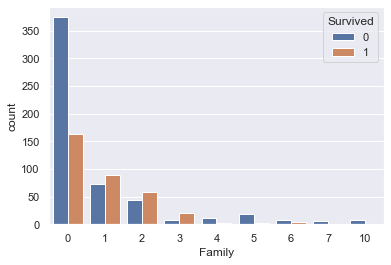

In [165]:

sns.set(font_scale=1)

plot_6 = sns.countplot(x='Family', data=train, hue='Survived')
plot_6.legend(fontsize=50)
sns.move_legend(plot_6,loc='upper right', title = 'Survived')

## 3. feature engineering and feature selection

In [26]:
# go back to raw data to create checkpoint
train_2 = train_raw.copy()
test_2 = test_raw.copy()

In [27]:
# drop Ticket, Cabin, Name(after extracting Title), PassengerId

In [28]:
train_2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [29]:
train_2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
test_2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
train_2.drop(['Ticket','Cabin', 'PassengerId'],axis=1, inplace=True)
test_2.drop(['Ticket','Cabin','PassengerId'],axis=1, inplace=True)

In [32]:
# pool titles into Mr, Mrs, Miss and Master
# replace titles (column) with these 4 categories
# drop Name

'''
['Rev','Don','Mr','Miss','Major','Mme','Lady','Dr','Mlle','Col',
'the Countess','Mrs','Jonkheer','Sir','Master','Capt','Ms']
'''

def title_generator(df):
    names = df['Name']
    title_col = []
    for name in names:
        t = name.split(sep=',')[1]
        t = t[1:]
        t = t[0:t.find('.')]
        title_col.append(t)
    return title_col

train_2['Title'] = title_generator(train_2)
train_2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [33]:
test_2['Title'] = title_generator(test_2)
test_2.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs


In [34]:
# group all non common titles to rare group
def replace_titles(df):
    title=df['Title']
    if title in ['Lady', 'Countess','Capt', 'Col','Don', 
                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']:
        return 'Rare'
    elif title in ['Mme','Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if df['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [35]:
train_2['Title']=train_2.apply(replace_titles, axis=1)

In [36]:
test_2['Title']=test_2.apply(replace_titles, axis=1)

In [37]:
# remove name column 
train_2.drop(['Name'],inplace=True, axis=1)
test_2.drop(['Name'],inplace=True, axis=1)

In [38]:
# replace missing values in age col with mean age 
age_mean_train = train_2['Age'].mean()
train_2['Age'].fillna(value=age_mean_train, inplace=True)
age_mean_test = test_2['Age'].mean()
test_2['Age'].fillna(value=age_mean_test, inplace=True)

In [39]:
# categorical columns: one hot encoded
# sex 
# Embarked
# title

In [40]:
train_3= train_2.copy()
test_3 = test_2.copy()

In [41]:
# transform Sex
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
train_3['Sex']= lb.fit_transform(train_3['Sex'])
train_3['Sex'].unique()

array([1, 0])

In [42]:
test_3['Sex']= lb.fit_transform(test_3['Sex'])
test_3['Sex'].unique()

array([1, 0])

In [43]:
# transform Embarked
lb = preprocessing.LabelEncoder()
train_3['Embarked']= lb.fit_transform(train_3['Embarked'])
train_3['Embarked'].unique()

array([2, 0, 1, 3])

In [44]:
test_3['Embarked']= lb.fit_transform(test_3['Embarked'])
test_3['Embarked'].unique()

array([1, 2, 0])

In [45]:
# transform Title
lb = preprocessing.LabelEncoder()
train_3['Title']= lb.fit_transform(train_3['Title'])
train_3['Title'].unique()

array([2, 3, 1, 0, 4, 5])

In [46]:
test_3['Title']= lb.fit_transform(test_3['Title'])
test_3['Title'].unique()

array([2, 3, 1, 0, 4])

In [47]:
train_3.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.538721,1.896745
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.794231,0.792167
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,5.000000


In [48]:
# shuffle to make sure
train_4 = train_3.copy()
train_4.head()
from sklearn.utils import shuffle as ushuffle
train_4 = ushuffle(train_4)
train_4.describe()    # should look the same

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.538721,1.896745
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.794231,0.792167
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,5.000000


In [49]:
train_4.shape

(891, 9)

In [50]:
test_3.shape

(418, 8)

## 4. Declare features and targets

In [51]:
X_all_from_train_dataset = train_4.iloc[:, 1:]
y_all_from_train_dataset = train_4['Survived']

In [52]:
X_all_from_train_dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
482,3,1,50.0,0,0,8.0500,2,2
317,2,1,54.0,0,0,14.0000,2,4
365,3,1,30.0,0,0,7.2500,2,2
175,3,1,18.0,1,1,7.8542,2,2
67,3,1,19.0,0,0,8.1583,2,2


In [53]:
y_all_from_train_dataset.head()

482    0
317    0
365    0
175    0
67     0
Name: Survived, dtype: int64

## 5. train "test"  split

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_all_from_train_dataset, y_all_from_train_dataset,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle = True)

## 6. Models
* 4.1 Random Forest
* 4.2 XGBoost

In [56]:

from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

def custom_accuracy_set (model, X_train, X_test, y_train, y_test, train=True):
    '''
    fit the model and prints accuracy metric
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    
    
    if train:
        x = X_train
        y = y_train
    elif not train:
        x = X_test
        y = y_test
        
    y_predicted = model.predict(x)
    
    accuracy = accuracy_score(y, y_predicted)
    print('model accuracy: {0:4f}'.format(accuracy))
    oconfusion_matrix = confusion_matrix(y, y_predicted)
    print('Confusion matrix: \n {}'.format(oconfusion_matrix))
    return accuracy

### 4.1 Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
model_random_forest = RandomForestClassifier(n_estimators=300,
                                             random_state=42,
                                            )
model_random_forest.fit(X_train_split,y_train_split)

RandomForestClassifier(n_estimators=300, random_state=42)

In [58]:
# random forest train accurracy

rf_train_accuracy = custom_accuracy_set(model_random_forest, X_train_split, X_test_split, y_train_split, y_test_split, train=True)

model accuracy: 0.985955
Confusion matrix: 
 [[433   3]
 [  7 269]]


In [59]:
# random forest test accurracy

rf_test_accuracy = custom_accuracy_set(model_random_forest, X_train_split, X_test_split, y_train_split, y_test_split, train=False)

model accuracy: 0.810056
Confusion matrix: 
 [[98 15]
 [19 47]]


## 4.2 XGBoost

In [60]:
import xgboost as xgb

In [61]:
model_xgb = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.2,n_jobs=-1)

In [62]:
model_xgb.fit(X_train_split,y_train_split)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10000, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [63]:
# xgb train accurracy

xgb_train_accuracy = custom_accuracy_set(model_xgb, X_train_split, X_test_split, y_train_split, y_test_split, train=True)

model accuracy: 0.985955
Confusion matrix: 
 [[431   5]
 [  5 271]]


In [64]:
# xgb test accurracy

xgb_test_accuracy = custom_accuracy_set(model_xgb, X_train_split, X_test_split, y_train_split, y_test_split, train=False)

model accuracy: 0.798883
Confusion matrix: 
 [[94 19]
 [17 49]]


## 5. export prediction

In [65]:
results = model_xgb.predict(test_3)

In [66]:
results

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [67]:
export_df = pd.DataFrame()

In [68]:
export_df['PassengerId'] = test_raw['PassengerId']
export_df['Survived'] = results

In [70]:
export_df.to_csv('Survived_2.csv', header=True, index=False)



https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/